In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds_hmeq = pd.read_csv('./csvfiles/HMEQ.csv')

In [3]:
ds_hmeq["JOB"].fillna("Other", inplace = True)
ds_hmeq.fillna(ds_hmeq.mean(), inplace = True)

In [4]:
ds_hmeq_dummy = pd.get_dummies(ds_hmeq)
ds_hmeq_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [5]:

np.random.seed(seed = 1234)
msk = np.random.rand(ds_hmeq_dummy.shape[0]) < 0.7
ds_hmeq_train = ds_hmeq_dummy[msk]
ds_hmeq_test = ds_hmeq_dummy[~msk]

ds_hmeq_train_y = ds_hmeq_train["BAD"]
ds_hmeq_train_x = ds_hmeq_train.drop("BAD", axis = 1)
ds_hmeq_test_y = ds_hmeq_test["BAD"]
ds_hmeq_test_x = ds_hmeq_test.drop("BAD", axis = 1)

print("train data X size:", ds_hmeq_train_x.shape)
print("train data y size:", ds_hmeq_train_y.shape)
print("test data X size:", ds_hmeq_test_x.shape)
print("test data y size:", ds_hmeq_test_y.shape)


train data X size: (2604, 18)
train data y size: (2604,)
test data X size: (1144, 18)
test data y size: (1144,)


In [6]:
ds_hmeq_train_x_scaled = scale(ds_hmeq_train_x, axis = 0)
ds_hmeq_test_x_scaled = scale(ds_hmeq_test_x, axis = 0)

In [7]:
model = ["DecisionTree", 'RF', 'GB', 'SVM']
test_accuracy = []
model_f1_score = []


### DT

In [8]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=10,
                                       min_samples_leaf=30, random_state=1234, )
tree.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
test_accuracy.append(tree.score(ds_hmeq_test_x_scaled,ds_hmeq_test_y))
# test 데이터 정확도
print("Accuray on test set:{:.3f}".format(tree.score(ds_hmeq_test_x_scaled, ds_hmeq_test_y)))

model_f1_score.append(f1_score(ds_hmeq_test_y, tree.predict(ds_hmeq_test_x_scaled)))

Accuray on test set:0.927


### RF

In [9]:
rf = RandomForestClassifier(criterion='gini', max_depth=4, n_estimators=500,
                                       min_samples_leaf=30, random_state=1234, )
rf.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
test_accuracy.append(rf.score(ds_hmeq_test_x_scaled,ds_hmeq_test_y))
# test 데이터 정확도
print("Accuray on test set:{:.3f}".format(rf.score(ds_hmeq_test_x_scaled, ds_hmeq_test_y)))

model_f1_score.append(f1_score(ds_hmeq_test_y, rf.predict(ds_hmeq_test_x_scaled)))

Accuray on test set:0.926


### GB

In [10]:
gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, n_estimators=5,
                                       min_samples_leaf=30, random_state=1234, )
gb.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
test_accuracy.append(gb.score(ds_hmeq_test_x_scaled,ds_hmeq_test_y))
# test 데이터 정확도
print("Accuray on test set:{:.3f}".format(gb.score(ds_hmeq_test_x_scaled, ds_hmeq_test_y)))

model_f1_score.append(f1_score(ds_hmeq_test_y, gb.predict(ds_hmeq_test_x_scaled)))

Accuray on test set:0.922


### SVM

In [11]:
svm = SVC(C=6, gamma=0.1, random_state=1234,)
                                       
svm.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
test_accuracy.append(svm.score(ds_hmeq_test_x_scaled,ds_hmeq_test_y))
# test 데이터 정확도
print("Accuray on test set:{:.3f}".format(svm.score(ds_hmeq_test_x_scaled, ds_hmeq_test_y)))

model_f1_score.append(f1_score(ds_hmeq_test_y, svm.predict(ds_hmeq_test_x_scaled)))

Accuray on test set:0.957


In [12]:
len(model)

4

In [13]:
(test_accuracy)

[0.92744755244755239,
 0.92569930069930073,
 0.92220279720279719,
 0.95716783216783219]

In [14]:
ds_eval = pd.DataFrame(index=model)
ds_eval["TestAccuracy"] = test_accuracy
ds_eval["F1Score"] = model_f1_score
ds_eval.round(3)

,TestAccuracy,F1Score
DecisionTree,0.927,0.420
RF,0.926,0.298
GB,0.922,0.239
SVM,0.957,0.692


In [15]:
import matplotlib.pyplot as plt

In [17]:
ds_eval

,TestAccuracy,F1Score
DecisionTree,0.927448,0.419580
RF,0.925699,0.297521
GB,0.922203,0.239316
SVM,0.957168,0.691824


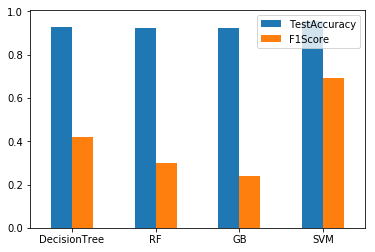

In [16]:
ds_eval.plot.bar(rot=0)